In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
#from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
df = pd.read_csv('./uber.csv')
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.columns


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0','key'],axis =1,inplace = True)


In [5]:
df.info()
clmn=[]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [6]:
#df.fillna(method='ffill', inplace=True) # Forward fill
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = imp.transform(df)
df=pd.DataFrame(df, columns = clmn)
df.info()


In [7]:
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
data_column = 'fare_amount'


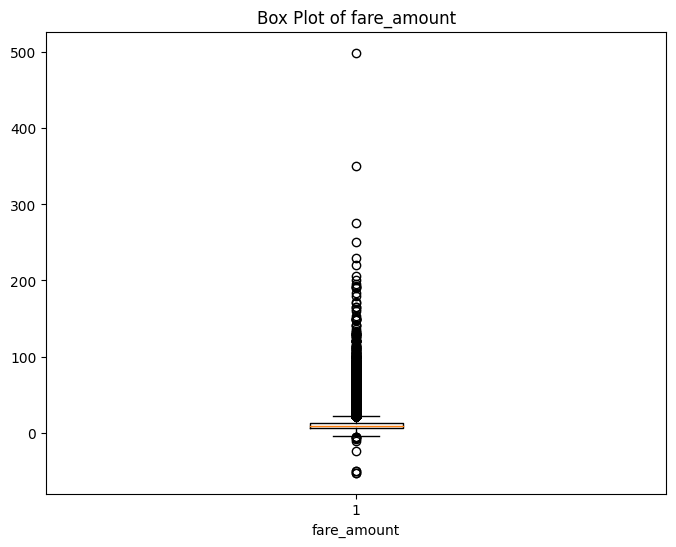

In [9]:
#Outliers
# Plotting boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df[data_column], vert=True)
plt.title(f'Box Plot of {data_column}')
plt.xlabel(data_column)
plt.show()


In [10]:
df[df['fare_amount'].values <= 0]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,0.00,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
87467,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1


In [11]:
# Dropping rows with fare_amout <= 0
df.drop(df[df['fare_amount'].values<=0].index,inplace=True)
df[df['fare_amount'].values<=0]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [12]:
data_column = 'passenger_count'


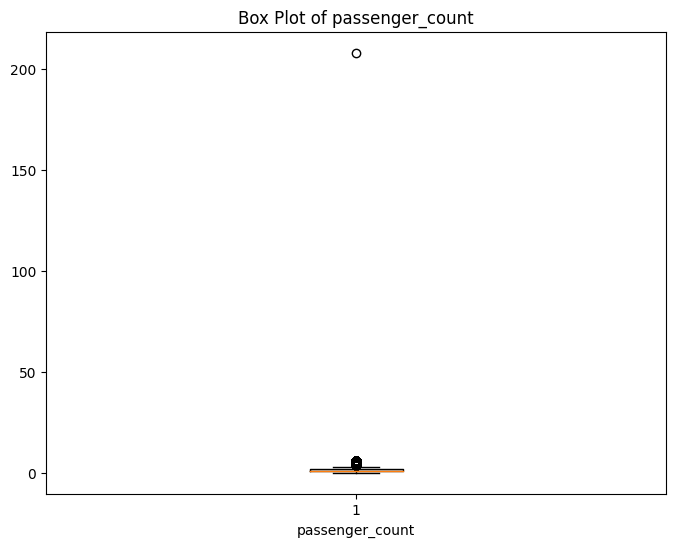

In [13]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df[data_column], vert=True)
plt.title(f'Box Plot of {data_column}')
plt.xlabel(data_column)
plt.show()


In [14]:
df[df['passenger_count'] > 6]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [15]:
df.drop(df[df['passenger_count'] > 6].index, inplace=True)


In [16]:
def filter_latitude(val):
    if val < -90 or val > 90:
        return np.nan
    else:
        return val


In [17]:
def filter_longitude(val):
    if val < -180 or val > 180:
        return np.nan
    else:
        return val


In [18]:
df['pickup_longitude'] = df['pickup_longitude'].apply(filter_longitude)
df['pickup_latitude'] = df['pickup_latitude'].apply(filter_latitude)
df['dropoff_longitude'] = df['dropoff_longitude'].apply(filter_longitude)
df['dropoff_latitude'] = df['dropoff_latitude'].apply(filter_latitude)


In [19]:
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    3
dropoff_latitude     3
passenger_count      0
dtype: int64

In [20]:
df.dropna(inplace=True)


In [21]:
#distance
# calculate the distance between pickup and dropoff using geopy library
from geopy.distance import great_circle
# used to calculate the distance using latitude and longitude


In [22]:
def distance_km(x):
    pickup = (x['pickup_latitude'], x['pickup_longitude'])
    dropoff = (x['dropoff_latitude'], x['dropoff_longitude'])
    return great_circle(pickup, dropoff).km


In [23]:
df['distance_km'] = df.apply(lambda x: distance_km(x), axis=1)


In [24]:
df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'] , inplace=True , axis= 1)


In [25]:
df.describe()


,fare_amount,passenger_count,distance_km
count,199965.000000,199965.000000,199965.000000
mean,11.362606,1.683450,20.475706
std,9.897212,1.306934,378.656218
min,0.010000,0.000000,0.000000
25%,6.000000,1.000000,1.215338
50%,8.500000,1.000000,2.120995
75%,12.500000,2.000000,3.874810
max,499.000000,6.000000,8782.911013


In [26]:
#dates

# convert the col pickup_datetime type to date and split it to Year and Month
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'] )


In [27]:
# extract day, weekday, month, year, hour from pickup_datetime
df['day'] = df['pickup_datetime'].dt.day_name()
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month_name()
df['year'] = df['pickup_datetime'].dt.year
df['hour'] = df['pickup_datetime'].dt.hour


In [28]:
# drop pickup_datetime
df.drop('pickup_datetime', axis=1, inplace=True)


In [29]:
df.head()


,fare_amount,passenger_count,distance_km,day,weekday,month,year,hour
0,7.5,1,1.683325,Thursday,3,May,2015,19
1,7.7,1,2.457593,Friday,4,July,2009,20
2,12.9,1,5.036384,Monday,0,August,2009,21
3,5.3,3,1.661686,Friday,4,June,2009,8
4,16.0,5,4.475456,Thursday,3,August,2014,17


In [30]:
# Initialize LabelEncoders for 'day' and 'month' columns
label_encoder_day = LabelEncoder()
label_encoder_month = LabelEncoder()


In [31]:
# Fit and transform the 'day' and 'month' columns
df['day'] = label_encoder_day.fit_transform(df['day'])
df['month'] = label_encoder_month.fit_transform(df['month'])


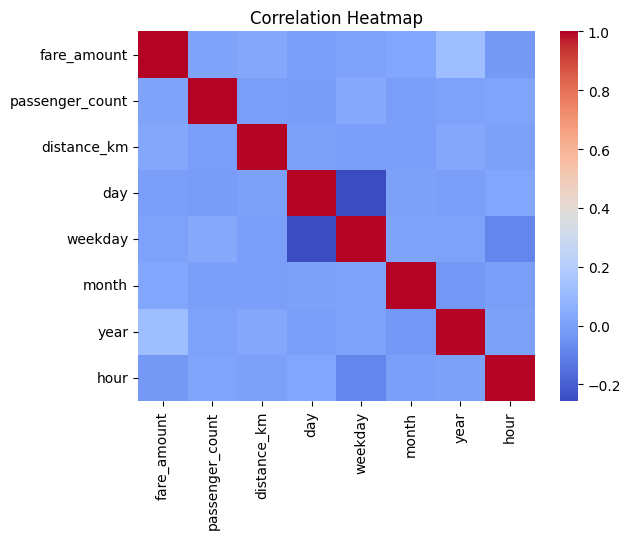

In [32]:
#correlation

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [33]:
X = df[['passenger_count', 'distance_km', 'day', 'weekday',
       'month', 'year', 'hour']]
y = df['fare_amount']


In [34]:

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Apply Standardization (z-score scaling) to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [37]:
# Predictions
y_pred_lr = lr.predict(X_test_scaled)


In [38]:
# Model Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)


In [39]:
print('RMSE:', rmse_lr)
print('R2:', r2_lr)


RMSE: 9.62660523716619
R2: 0.015387534611956188


In [40]:
# Linear regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [41]:
# Predictions
y_pred_rf = rf.predict(X_test_scaled)


In [42]:
# Model Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


In [43]:
print('RMSE:', rmse_rf)
print('R2:', r2_rf)


RMSE: 5.075933682942274
R2: 0.7262520454410528


In [44]:
models = ['Linear Regression', 'Random Forest']
rmse_values = [rmse_lr, rmse_rf]
r2_values = [r2_lr, r2_rf]


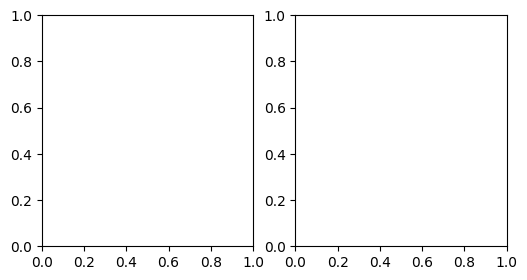

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))


In [46]:
# Plot RMSE values
ax1.bar(models, rmse_values, color=['blue', 'green'])
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Comparison')
ax1.set_ylim(0, max(rmse_values) + 2)


(0.0, 11.62660523716619)

In [47]:
# Plot R2 values
ax2.bar(models, r2_values, color=['blue', 'green'])
ax2.set_ylabel('R2')
ax2.set_title('R2 Comparison')
ax2.set_ylim(0, 1)


(0.0, 1.0)

In [48]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>